# (Analyzing Ford GoBike)
## by (Adel Almutairi)

## Investigation Overview

> The golas that I am going to present are the results between users type

## Dataset Overview

> 1- Explore monthly usage of the bike share system per user type

> 2- Weekly usage of the bike share system per user type

> 3- Hourly usage of the bike share system per user type


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import glob
import os
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('fordgo_master.csv')
df_clean.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Start time month

Monthly usage of the bike share system per user type

In [3]:
# Changing the format to datetime
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [4]:
# changing the format to datetime
df_clean['start_time_date']=df_clean['start_time'].dt.date
df_clean['end_time_date']=df_clean['end_time'].dt.date

In [5]:
# set start time month to object
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)
df_clean['end_time_month']=df_clean['end_time'].dt.month.astype(int)

<Figure size 841.68x595.44 with 0 Axes>

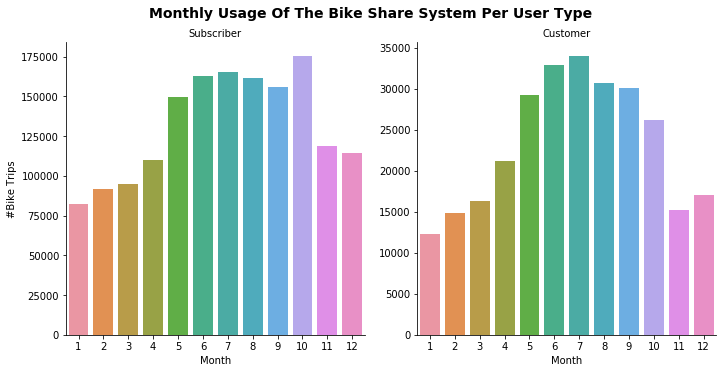

In [6]:
# monthly usege of the bike sharing system per user type
plt.figure(figsize=[ 11.69, 8.27]);
g = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False)            
g.set_axis_labels("Month", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Monthly usage of the bike share system per user type'.title(), y=1.03, fontsize=14, fontweight='semibold');


**Customers: demand is high around summertime, reaching its peak in July. Customers are most probably tourists, or the occasional riders who visit the Bay Area. Subscribers: the highest demand is from May till October, reaching it's peak in October. Subscribers are most likely riders using the bikes for their daily commute**

## Start time weekday

Weekly usage of the bike share system per user type

In [7]:
# changing start_time_weekday format to datetime
df_clean['start_time_weekday']=df_clean['start_time'].dt.weekday_name
df_clean['end_time_weekday']=df_clean['end_time'].dt.weekday_name

<Figure size 841.68x595.44 with 0 Axes>

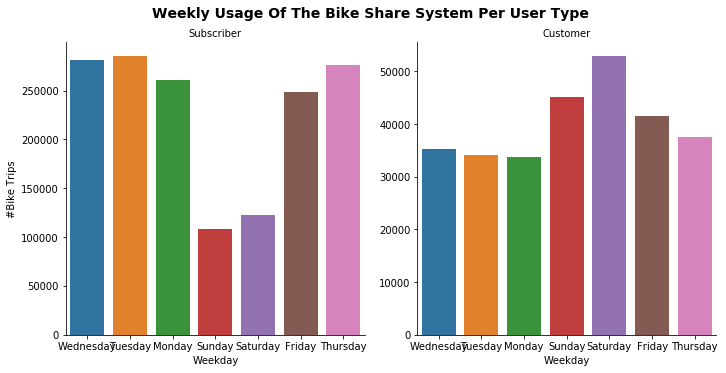

In [8]:
# weekday usege of the bike sharing system per user type
plt.figure(figsize=[ 11.69, 8.27]);
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count' , sharey = False)        
g.set_axis_labels("Weekday", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly usage of the bike share system per user type'.title(), y=1.03, fontsize=14, fontweight='semibold');

**There is a different trend on which days customers and subscribers rent bikes. As mentioned above customers are most probably occasional riders and tourist who use the bike sharing system on holiday or weekend trips. On the other hand, subscribers are most probably daily work/school commuters who use the system within a week**


## Start time hour

Hourly usage of the bike share system per user type

In [9]:
df_clean['start_time_hour']=df_clean['start_time'].dt.hour
df_clean['end_time_hour']=df_clean['end_time'].dt.hour

<Figure size 841.68x595.44 with 0 Axes>

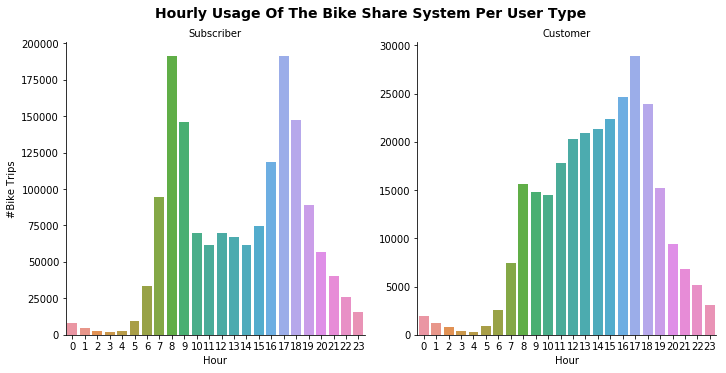

In [10]:
# hourly usege of the bike sharing system per user type
plt.figure(figsize=[ 11.69, 8.27]);
g = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False)          
g.set_axis_labels("Hour", "#Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage of the bike share system per user type'.title(), y=1.03, fontsize=14, fontweight='semibold');


**There is also a different trend of when during the day bikes are rented most often. Customers use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. Subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work**

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [11]:
! jupyter nbconvert slide_deck.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 362296 bytes to slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\am.almutairi\AppData\Local\Continuum\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\am.almutairi\AppData\Local\Continuum\anaconda3\lib\site-packages\jupyter_core\application.py", line 266, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\am.almutairi\AppData\Local\Continuum\anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\am.almutairi\AppData\Local\Continuum\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 337, in start
    self.convert_notebooks()
  File "C:\Users\am.almutairi\AppData\Local\Continuum\anaconda

## In conculsuion

**In the exploration, I found that there are two types of clients using the system: subscribers who are mainly daily commuters, having short trips to and from work, who rent a bike on weekdays at 8-9am and 5-6pm, and, occasionally around the lunch time, and customers, usually tourists or occassional riders who use the system mainly on weekends to explore the Bay Area. The bike share system was used more often around summertime (May-October) with a clear drop from January to March, most probably due to the weather condition. Moreover, I have checked if there are some differences in trends for genders**